# Advanced Visualization

In [4]:
# 1. Category data type in Python
# 2. JointPlots
# 3. Histograms
# 4. Stacked Histograms
# 5. KDE Plot
# 6. Using the Subplots() function
# 7. ViolinPlots
# 8. Creating a Faced Grid
# 9. Coordinates and Diagonals
# 10. Building Dashboards
# 11. Styling Tips
# 12. Finishing Touches

### Category data type in Python

In [5]:
import pandas as pd
import os

In [6]:
os.getcwd()

'/Users/Nulyaka/Desktop/py-udemy'

In [7]:
movies = pd.read_csv('/Users/Nulyaka/Desktop/py-udemy/P4-Movie-Ratings.csv')

In [8]:
len(movies)

559

In [9]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [10]:
# as seen beyond, it contains unnecessary information (e.g. mean of Year of release)
movies.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
# Film, Genre and Year of release should be categorical
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [12]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [13]:
movies.columns = ['Film', 'Genre', 'CriticRatings', 'AudienceRatings', 'Budget', 'ReleaseYear']

In [14]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.ReleaseYear = movies.ReleaseYear.astype('category')

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   CriticRatings    559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   Budget           559 non-null    int64   
 5   ReleaseYear      559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [16]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [17]:
movies.head()

,Film,Genre,CriticRatings,AudienceRatings,Budget,ReleaseYear
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


### JointPlots

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

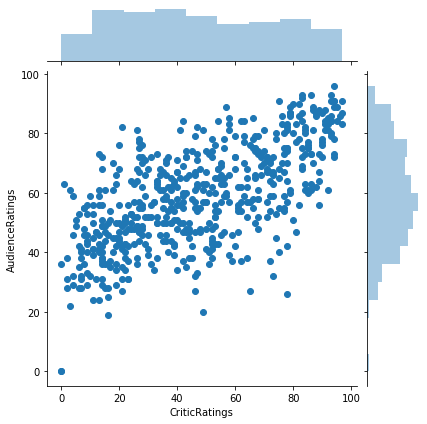

In [19]:
j = sns.jointplot(data=movies, x='CriticRatings', y='AudienceRatings')

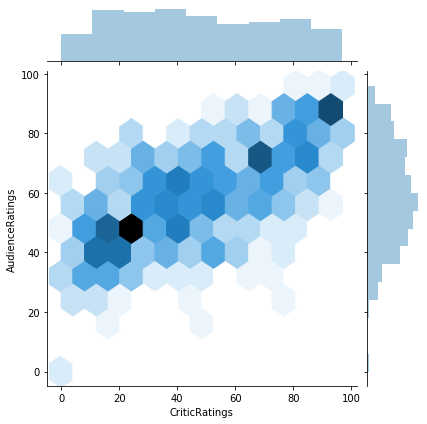

In [20]:
# to see clasters we can change kind to hex
j = sns.jointplot(data=movies, x='CriticRatings', y='AudienceRatings', kind='hex')

### Histograms

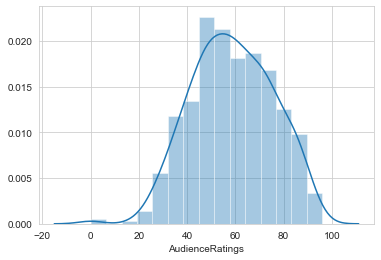

In [21]:
sns.set_style('whitegrid')
m1 = sns.distplot(movies.AudienceRatings, bins=15)

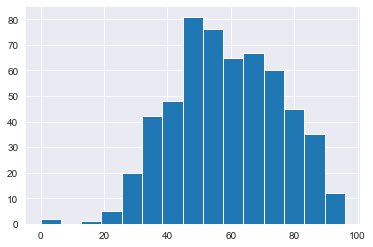

In [22]:
sns.set_style('darkgrid')

# normally distributed
n1 = plt.hist(movies.AudienceRatings, bins=15)

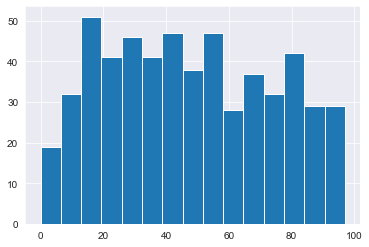

In [23]:
# uniformly distributed
n1 = plt.hist(movies.CriticRatings, bins=15)

### Stacked Histograms

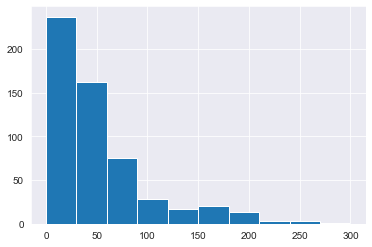

In [24]:
plt.hist(movies.Budget)
plt.show()

In [25]:
filter1 = movies[movies.Genre == 'Drama'].Budget
filter1.head()

10    30
11    20
13     7
18     8
23    20
Name: Budget, dtype: int64

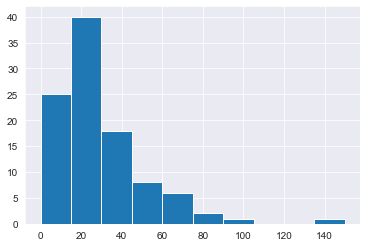

In [26]:
plt.hist(filter1)
plt.show()

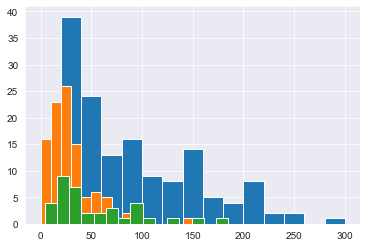

In [27]:
# adding one by one into hist
plt.hist(movies[movies.Genre == 'Action'].Budget, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].Budget, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].Budget, bins=15)
plt.show()

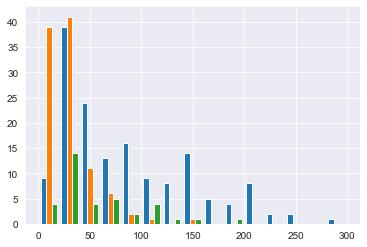

In [28]:
# adding a list into hist, but not stacked
l1 = list()
l1 = [movies[movies.Genre == 'Action'].Budget, 
     movies[movies.Genre == 'Drama'].Budget, 
     movies[movies.Genre == 'Thriller'].Budget]

plt.hist(l1, bins=15)
plt.show()

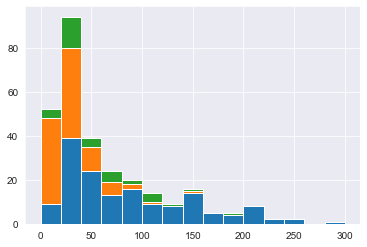

In [29]:
# adding a list into hist, stacked
plt.hist(l1, bins=15, stacked=True)
plt.show()

In [30]:
# instead of adding each genre one by one, make it in the loop
# 1. checking all gens
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


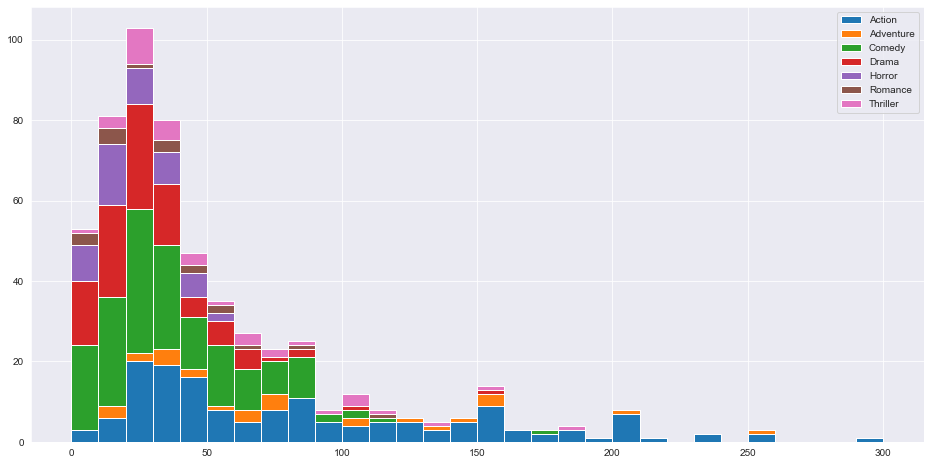

In [31]:
# 2. appending every genres budget list into a new list
l2 = list()
mylabels = list()

for gen in movies.Genre.cat.categories:
    l2.append(movies[movies.Genre == gen].Budget)
    mylabels.append(gen)
    
plt.figure(figsize=(16,8))
plt.hist(l2, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

### KDE Plot

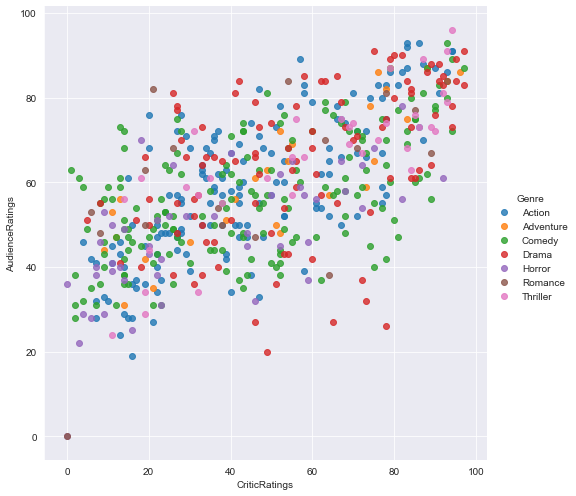

In [32]:
vis1 = sns.lmplot(data=movies, x='CriticRatings', y='AudienceRatings', 
                  fit_reg=False, hue='Genre', size=7, aspect=1)

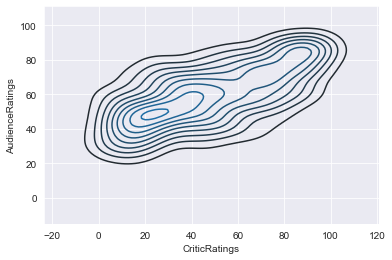

In [33]:
kde1 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings)

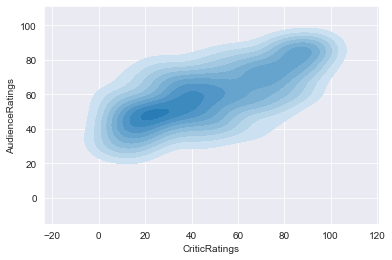

In [34]:
kde2 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade=True, shade_lowest=False)

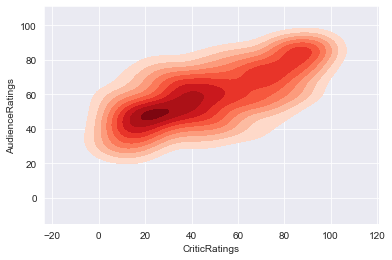

In [35]:
kde3 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Reds')

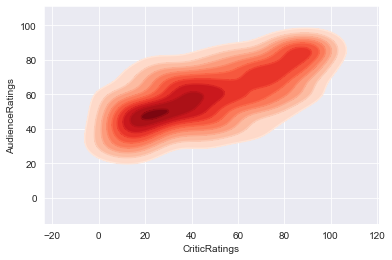

In [36]:
# tip: to make it smooth, use layers
kde4a = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Reds')
kde4b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds')

### Using the Subplots() function

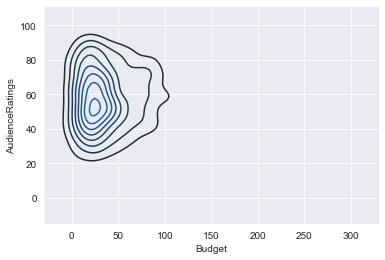

In [37]:
# higher budget make the movie middle rated in average
kde5 = sns.kdeplot(movies.Budget, movies.AudienceRatings)

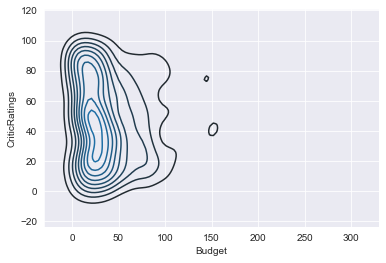

In [38]:
kde5 = sns.kdeplot(movies.Budget, movies.CriticRatings)

[(-20, 200)]

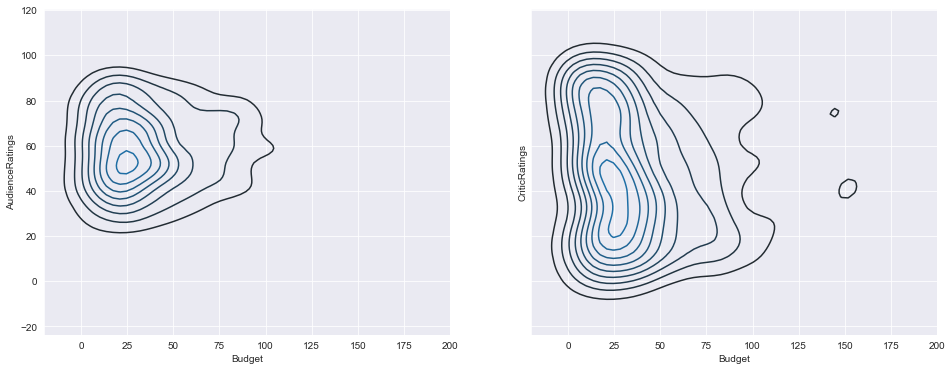

In [39]:
# subplots 1 row, 2 columns matrix
# sharex, sharey makes the size of charts the same
f, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

sp1 = sns.kdeplot(movies.Budget, movies.AudienceRatings, ax=axes[0],)
sp2 = sns.kdeplot(movies.Budget, movies.CriticRatings, ax=axes[1])
sp1.set(xlim=(-20, 200))

[(-20, 200)]

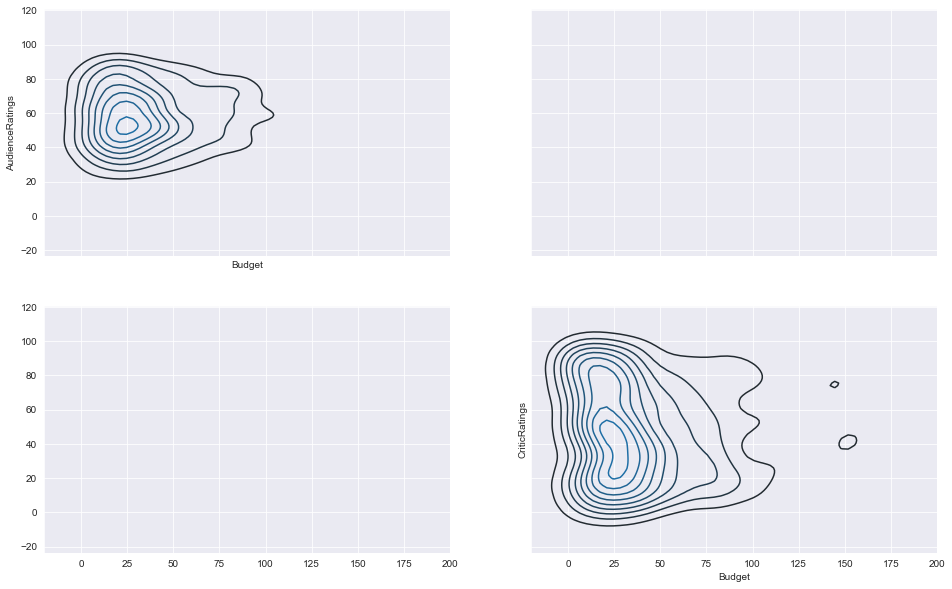

In [40]:
# subplots 2 row, 2 columns matrix
f, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)

# access to subplots via ax by passing a matrix axes
sp1 = sns.kdeplot(movies.Budget, movies.AudienceRatings, ax=axes[0, 0])
sp2 = sns.kdeplot(movies.Budget, movies.CriticRatings, ax=axes[1, 1])
sp1.set(xlim=(-20, 200))

### ViolinPlots

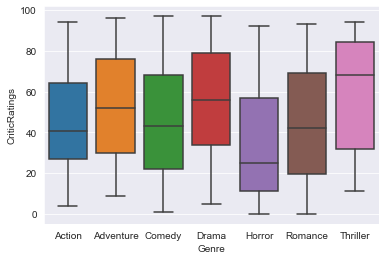

In [41]:
# difference between boxplots and violinplots
bp1 = sns.boxplot(data=movies, x='Genre', y='CriticRatings')

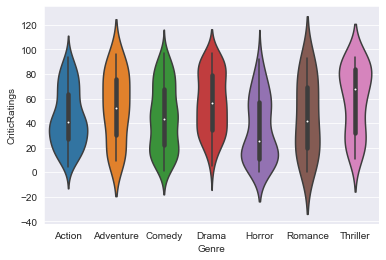

In [42]:
vp1 = sns.violinplot(data=movies, x='Genre', y='CriticRatings')

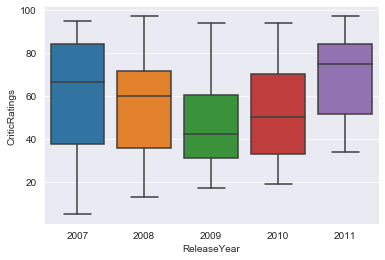

In [43]:
# more examples
bp2 = sns.boxplot(data=movies[movies.Genre == 'Drama'], x='ReleaseYear', y='CriticRatings')

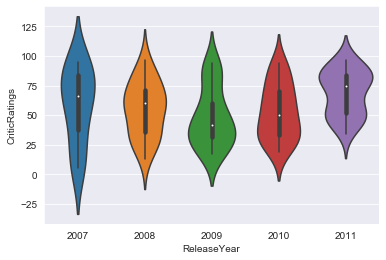

In [44]:
vp2 = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='ReleaseYear', y='CriticRatings')